The best way to learn something is to apply it. Today, I decided to revise linear algebra and apply the concepts as seen below using Python. My objective is to internalize the workings of vectors in space, learn how to plot in python and be creative and clear with my writings. First I just load up the libraries that I'll be using for this exercise. 

In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

The most fundamental concept of linear algebra is the concept of vectors. A vector is a quantity with both direction and magnitude. In computer science vectors are represented in columns such as [1 2]. This vector has a tail at the origin i.e. [0,0] and then we can think of the end point being by moving one unit on the x-axis to the right and then moving two units up on the y axis. I plot this vector as seen below.

In [222]:
#function to draw vectors
def draw_vect(V,option='s'):
    plt.axhline(y=0, color='k')  #draw the x and y axes
    plt.axvline(x=0, color='k')
    if (option == 's'):
        plt.scatter([0,V[0]],[0,V[1]]) #this allows me to draw the head of vector as a point
    elif(option=='l'): #this allows me to draw line vectors
        plt.plot([0,V[0]],[0,V[1]])

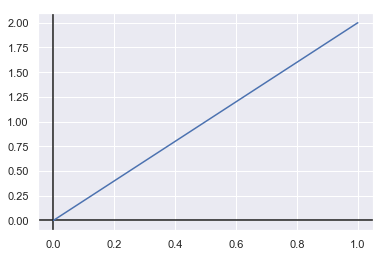

In [223]:
V1 = np.array([1,2])  #create a numpy matrix to allow me to later use numpy functions
draw_vect(V1,'l')
#plt.scatter(1,2) #plot the vector


Another fundamental concept is that of scalars. Scalars are values which only have a magnitude and no direction. They are used to scale the vectors. An example is seen below. The red line is vector V1 [1 2] which after being multiplied by a scalar of 2 is now [2 4] i.e double the length of the original vector represented by the blue vector.

[1 2] [2 4]


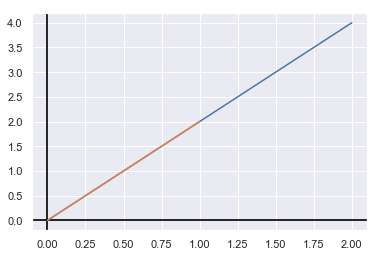

In [226]:
V1 = np.array([1,2])
V2 = 2 * V1
print(V1,V2)
draw_vect(V2,'l')
draw_vect(V1,'l')

Vectors can also be added together. Let's see how this works. Shown below are two vectors being added. This is equivalent to moving 1 unit right then 2 units up followed by 2 units right and then 1 unit down. This can also be thought of as simply adding the X and Y values as [1 2] + [2 -1] = [3 2].

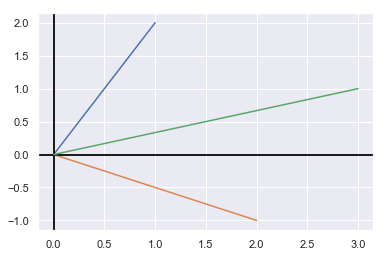

In [227]:
V1 = np.array([1,2])
V2 = np.array([2,-1])
V3 = V1 + V2
draw_vect(V1,'l') #blue li e
draw_vect(V2,'l') #red line
draw_vect(V3,'l') #green line showing addition of vectors


Consider a vector of unit length x and unit length y. This is called a basis vector. Now we can take any of the above vector valeus such as [2 3] and consider the values 2 and 3 as scalar values which are used to scale this basis vector. By taking 2 scalar values we can represent any vector in the entire 2d space. 

Another important terminology is the span of 2 vectors. Consider a vector v and w. The span is set of all linear combinations av + bw where a and b are scalar values.

From this point onwards I will only draw the head of the vector and represent vectors as points. This is to prevent crowding of the graph as seen below. I wrote some simple code to just draw a bunch of the different vectors which are possible using two vectors. Nice isn't it?

In [246]:
V1 = np.array([1,2])
V2 = np.array([3,2])
def draw_span(V1,V2,a_max,b_max):
    for i in range(-a_max,a_max):
        a=i
        for j in range(-b_max,b_max):
            b=j
            V3 = a*V1 + b*V2
            draw_vect(V3)

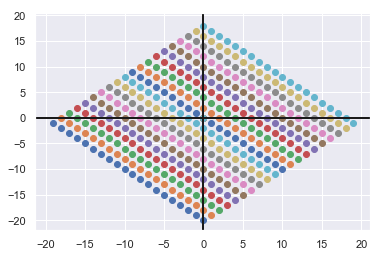

In [261]:
V1 = np.array([-1,1])
V2 = np.array([1,1])
draw_span(V1,V2,10,10)

0 vectors have 0 span


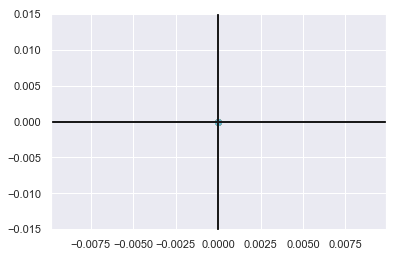

In [262]:
print("0 vectors have 0 span")
V1 = np.array([0,0])
V2 = np.array([0,0])
draw_span(V1,V2,3,10)

Linearly dependent vectors have a linear span


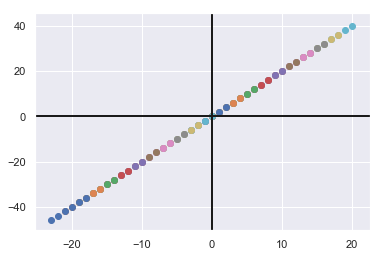

In [263]:
print("Linearly dependent vectors have a linear span")
V1 = np.array([1,2])
V2 = np.array([2,4])
draw_span(V1,V2,3,10)

Linear dependence was mentioned in the above graph. A vector v is said to be linearly dependent on a vector w if w can provide all information about v thus making v redundant. This means that w and v both exist on one straight line with w being longer than v. An example of this was seen above in the section about scalars. 

Vectors are used in representing systems of linear equations in a concise, easy to read which is easy for a computer to understand as well. For example 3x + 2y and 5x + 3y can be represented by:

In [284]:
A=np.array([[3,2],[5,3]])
print(A)
print('*')
print(B) 

[[3 2]
 [5 3]]
*
[['X']
 ['Y']]


We can perform many transformations on a matrix. For example shear or rotation. Suppose we wanted to apply a composite of functions on a matrix such as shear followed by rotation - one option is to apply each transformation one after the other on the matrix. Another more scalable option is to take all of the transformations and multiply them together into one composite transformation matrix which can then be applied onto the matrix that has to be transformed. I demonstrate this below. I define 2 transforms inverse and mirror and first apply them individually and then apply them as a composite function.

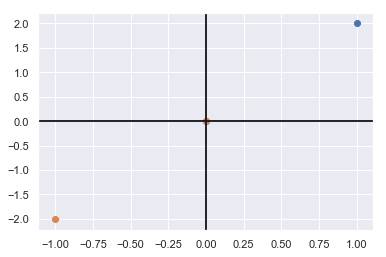

In [305]:
def transform_and_plot(operation,V):
    V = V*operation
    draw_vect(V)
    return V

V1 = np.array([1,2])
inverse = np.array([-1,-1])
mirror = np.array([-1,1])
draw_vect(V1)
V1_inv=transform_and_plot(inverse,V1)

array([ 1, -2])

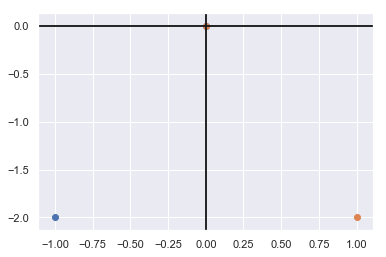

In [306]:
draw_vect(V1_inv)
transform_and_plot(mirror,V1_inv)

array([ 1, -2])

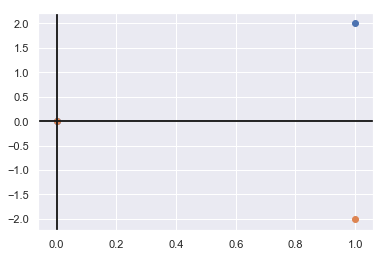

In [310]:
composite = mirror*inverse #the order of these operations matter (not in this case)
draw_vect(V1)
transform_and_plot(composite,V1)

Determinant of a matrix: Very simply this can be defined as a scalar value that scales the area of the basis vector. For example a matrix [[3,0],[0,2]] would scale the area of the unit basis vector (area = 1) to an area of 6 and also the determinant of the matrix is 6 which is proven below. 

In [367]:
V = [[3,0],[0,2]]
np.linalg.det(V)


6.0